# Toric codes

## Encoding

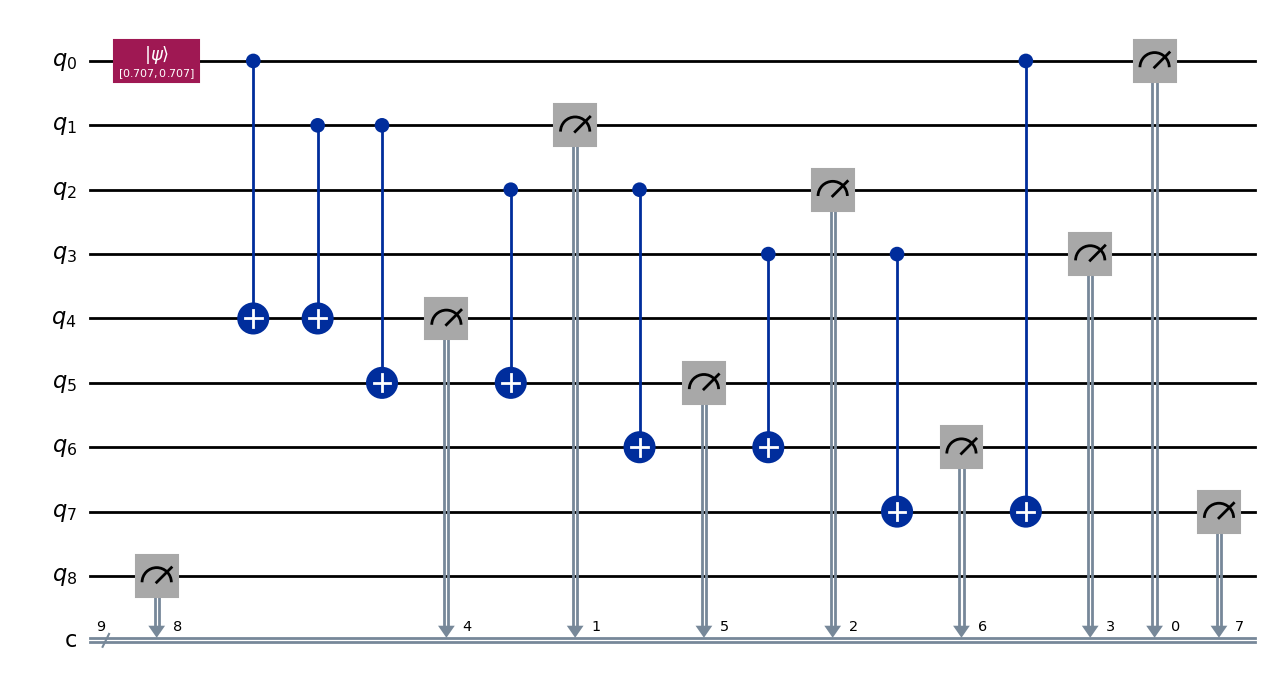


Measurement Results:  {'000000000': 501, '010010001': 523}


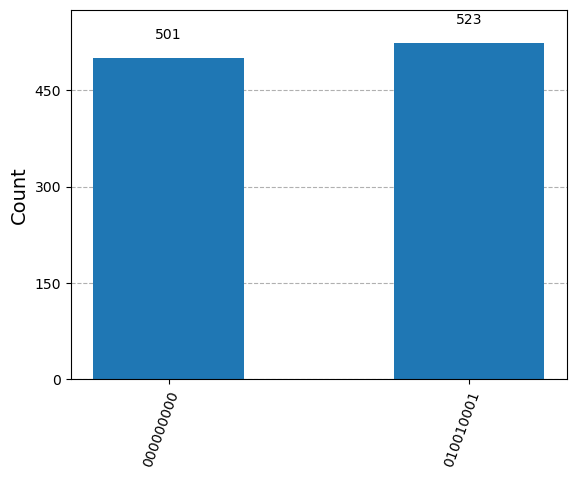

In [6]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
from IPython.display import display
import numpy as np

def encode_toric_code(initial_state):
    """
    Encodes a single qubit state into a toric code.
    
    Parameters:
        initial_state (tuple): A tuple representing the initial state to encode (alpha, beta) for alpha|0> + beta|1>
    """
    alpha, beta = initial_state

    # Create a quantum circuit with 9 qubits (4 data qubits, 5 ancillary qubits)
    qc = QuantumCircuit(9, 9)

    # Encode the initial state into the first qubit
    qc.initialize([alpha, beta], 0)
    
    # Apply CNOTs for stabilizer checks (simplified for demonstration)
    # The following operations are based on a simple 2x2 toric code
    # Create a small 2x2 toric code lattice

    # Stabilizers for plaquettes (apply CNOTs)
    qc.cx(0, 4)  # X stabilizer
    qc.cx(1, 4)
    qc.cx(1, 5)  # X stabilizer
    qc.cx(2, 5)
    qc.cx(2, 6)  # X stabilizer
    qc.cx(3, 6)
    qc.cx(3, 7)  # X stabilizer
    qc.cx(0, 7)

    # Measure the stabilizers (for demonstration, in practice these would be ancillary qubits)
    qc.measure(range(9), range(9))

    return qc

# Define the initial state to encode (e.g., |ψ> = α|0> + β|1>)
alpha = 1 / np.sqrt(2)
beta = 1 / np.sqrt(2)
initial_state = (alpha, beta)

# Encode the state using the toric code
qc = encode_toric_code(initial_state)

# Display the circuit
circuit_draw = qc.draw(output='mpl')
display(circuit_draw)

# Execute the circuit
simulator = AerSimulator()
result = simulator.run(qc).result()
counts = result.get_counts()

print("\nMeasurement Results: ", counts)

# Plot the results
histogram = plot_histogram(counts)
display(histogram)


## Decoding

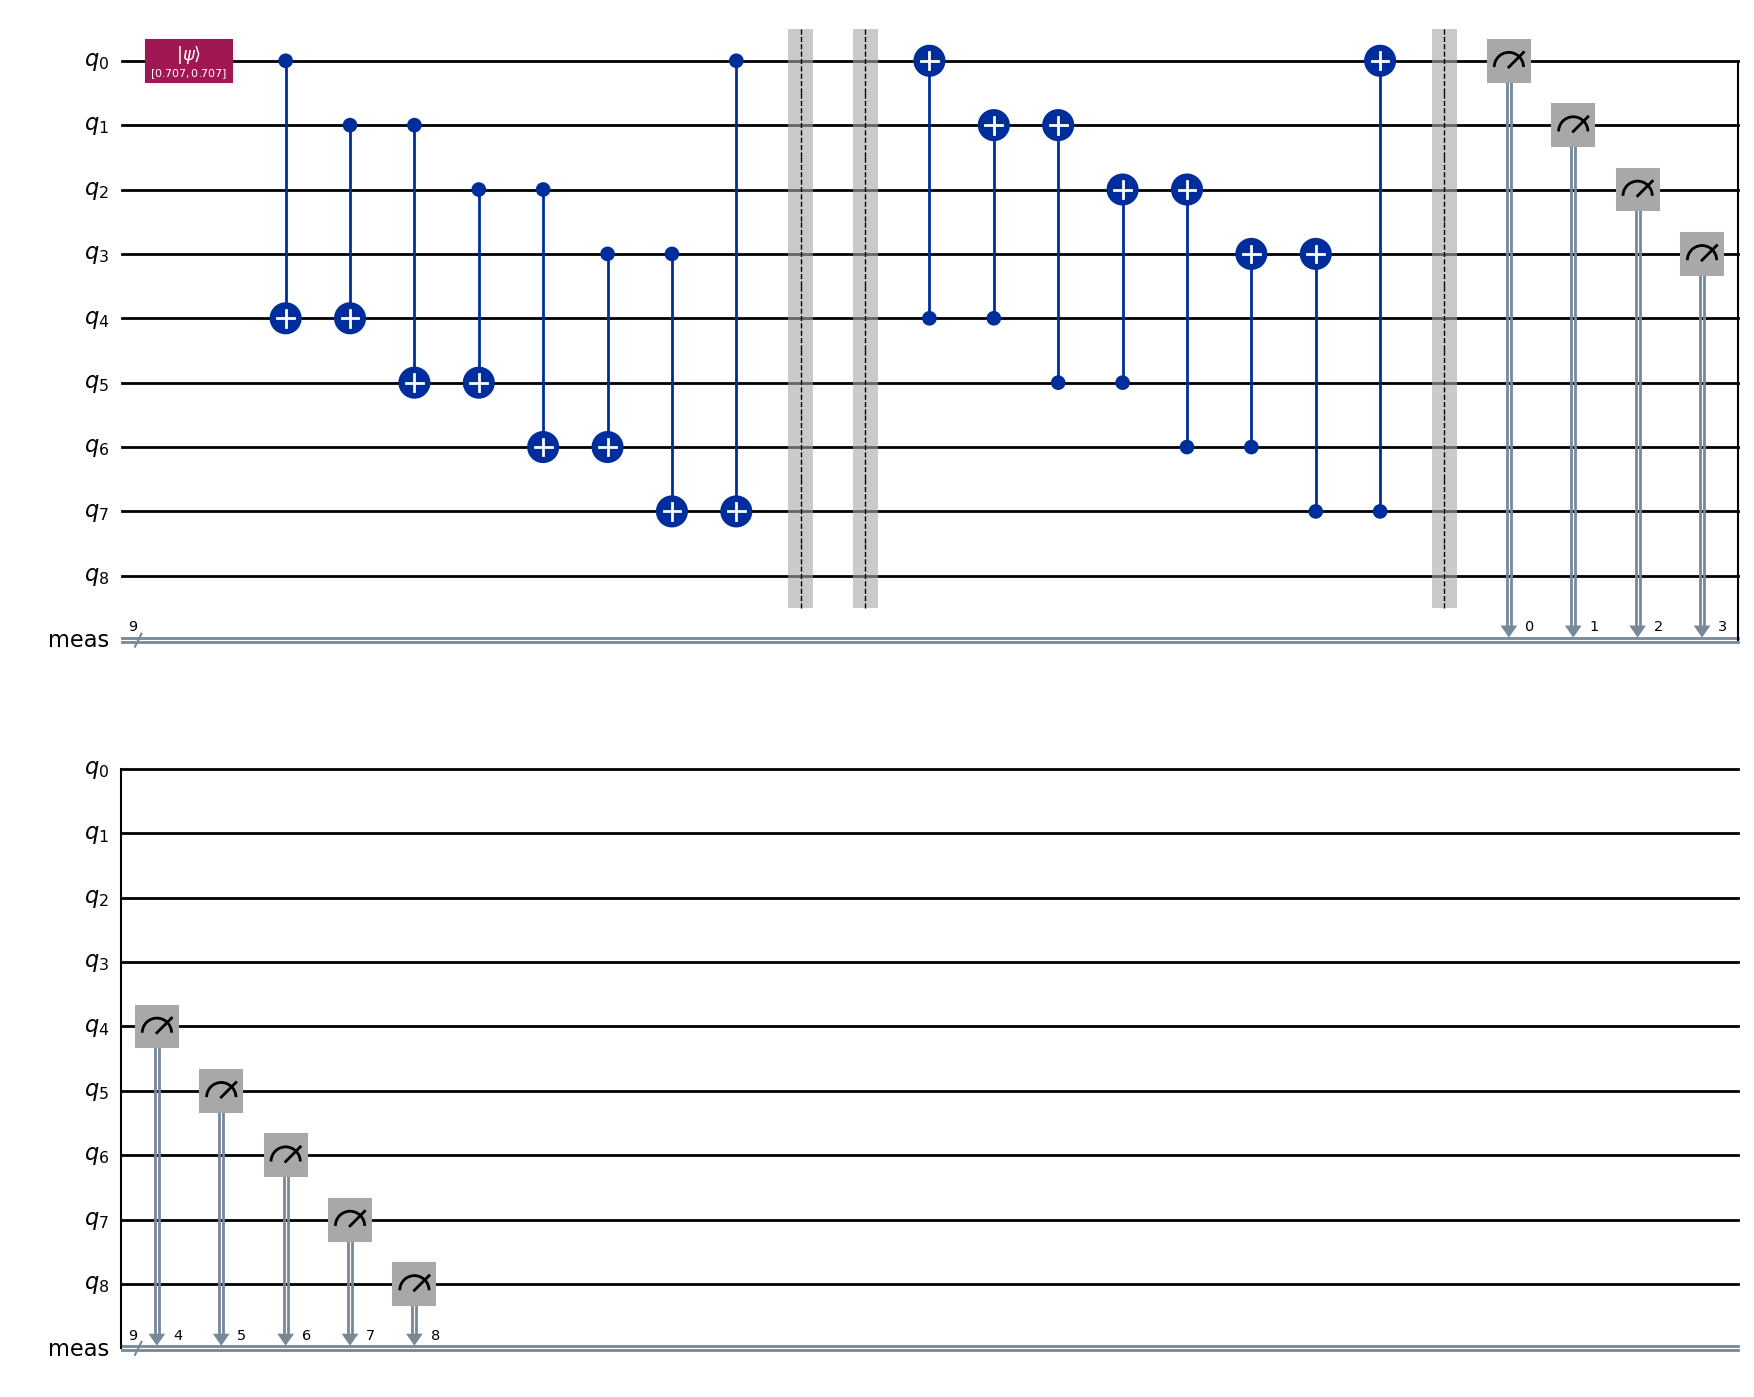


Measurement Results:  {'010011011': 537, '000000000': 487}


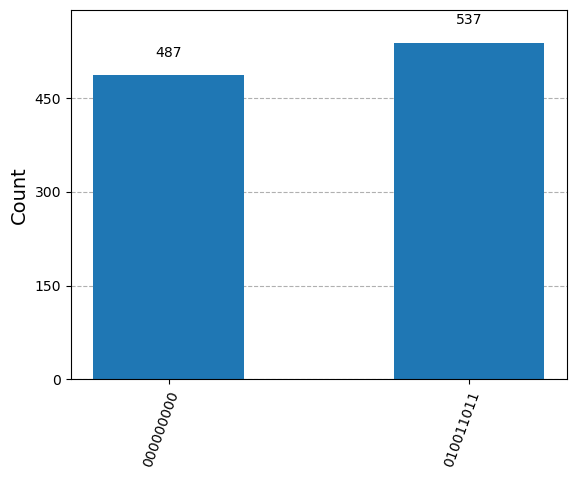

In [11]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
from IPython.display import display
import numpy as np

def encode_toric_code(initial_state):
    """
    Encodes a single qubit state into a toric code.
    
    Parameters:
        initial_state (tuple): A tuple representing the initial state to encode (alpha, beta) for alpha|0> + beta|1>
    """
    alpha, beta = initial_state

    # Create a quantum circuit with 9 qubits (4 data qubits, 5 ancillary qubits)
    qc = QuantumCircuit(9)

    # Encode the initial state into the first qubit
    qc.initialize([alpha, beta], 0)
    
    # Apply CNOTs for stabilizer checks (simplified for demonstration)
    # The following operations are based on a simple 2x2 toric code
    # Create a small 2x2 toric code lattice

    # Stabilizers for plaquettes (apply CNOTs)
    qc.cx(0, 4)  # X stabilizer
    qc.cx(1, 4)
    qc.cx(1, 5)  # X stabilizer
    qc.cx(2, 5)
    qc.cx(2, 6)  # X stabilizer
    qc.cx(3, 6)
    qc.cx(3, 7)  # X stabilizer
    qc.cx(0, 7)

    # Barrier after encoding
    qc.barrier()

    return qc

def decode_toric_code():
    """
    Creates a quantum circuit to decode the toric code by applying corrective operations.
    
    Returns:
        QuantumCircuit: The decoding quantum circuit.
    """
    qc = QuantumCircuit(9)

    # Barrier before decoding
    qc.barrier()

    # Apply corrective operations based on the stabilizer measurements
    qc.cx(4, 0)  # Correct X error on qubit 0
    qc.cx(4, 1)  # Correct X error on qubit 1
    qc.cx(5, 1)  # Correct X error on qubit 1
    qc.cx(5, 2)  # Correct X error on qubit 2
    qc.cx(6, 2)  # Correct X error on qubit 2
    qc.cx(6, 3)  # Correct X error on qubit 3
    qc.cx(7, 3)  # Correct X error on qubit 3
    qc.cx(7, 0)  # Correct X error on qubit 0

    return qc

# Define the initial state to encode (e.g., |ψ> = α|0> + β|1>)
alpha = 1 / np.sqrt(2)
beta = 1 / np.sqrt(2)
initial_state = (alpha, beta)

# Encode the state using the toric code
encode_circuit = encode_toric_code(initial_state)

# Create the decoding circuit
decode_circuit = decode_toric_code()

# Combine the encoding and decoding circuits
full_circuit = encode_circuit.compose(decode_circuit)

# Add measurement at the end of the combined circuit
full_circuit.measure_all()

# Display the circuit
circuit_draw = full_circuit.draw(output='mpl')
display(circuit_draw)

# Execute the circuit
simulator = AerSimulator()
result = simulator.run(full_circuit).result()
counts = result.get_counts()

print("\nMeasurement Results: ", counts)

# Plot the measurement results
histogram = plot_histogram(counts)
display(histogram)


## Comparing in and out qubit state

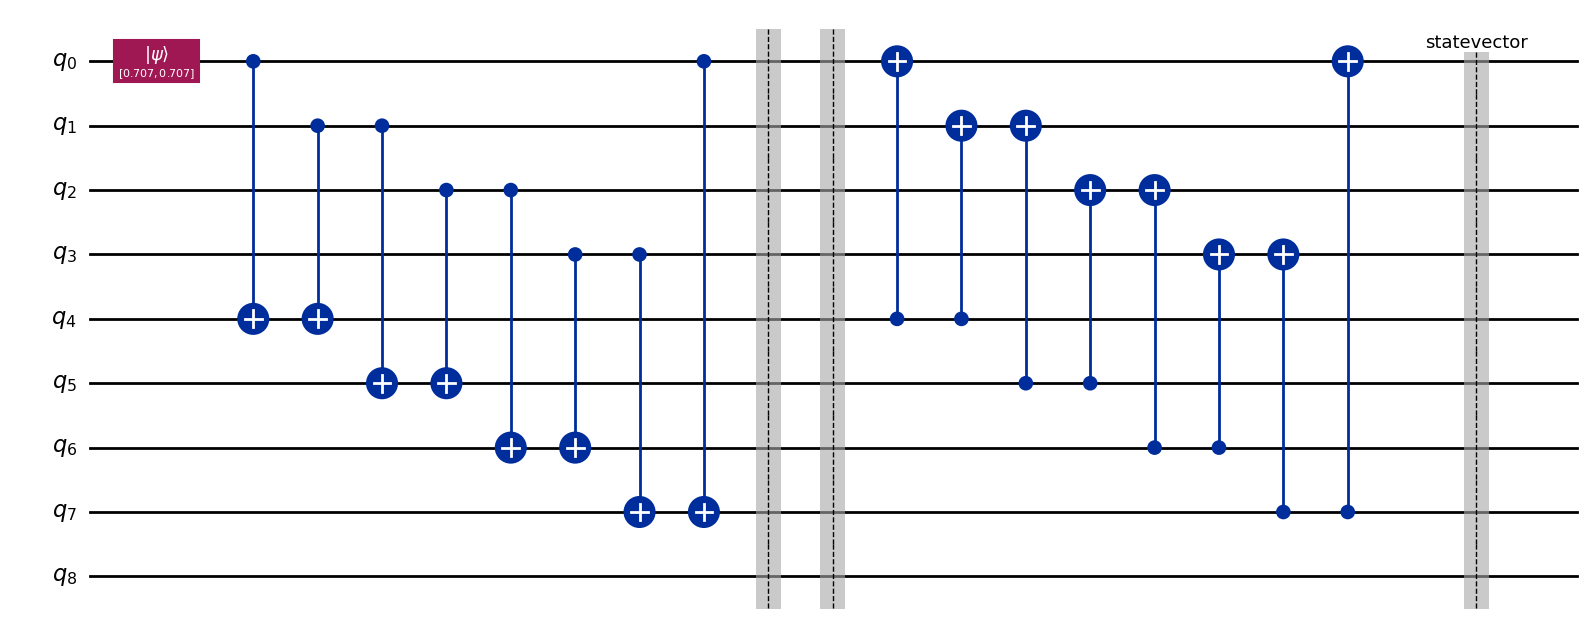

Initial Density Matrix:


<IPython.core.display.Latex object>

Partial Traced Density Matrix:


<IPython.core.display.Latex object>

The initial state and the partial traced state are not equal.


In [17]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.visualization import array_to_latex
from qiskit.quantum_info import Statevector, partial_trace, DensityMatrix
from IPython.display import display
import numpy as np

def encode_toric_code(initial_state):
    """
    Encodes a single qubit state into a toric code.
    
    Parameters:
        initial_state (tuple): A tuple representing the initial state to encode (alpha, beta) for alpha|0> + beta|1>
    """
    alpha, beta = initial_state

    # Create a quantum circuit with 9 qubits (4 data qubits, 5 ancillary qubits)
    qc = QuantumCircuit(9)

    # Encode the initial state into the first qubit
    qc.initialize([alpha, beta], 0)
    
    # Apply CNOTs for stabilizer checks (simplified for demonstration)
    # The following operations are based on a simple 2x2 toric code
    # Create a small 2x2 toric code lattice

    # Stabilizers for plaquettes (apply CNOTs)
    qc.cx(0, 4)  # X stabilizer
    qc.cx(1, 4)
    qc.cx(1, 5)  # X stabilizer
    qc.cx(2, 5)
    qc.cx(2, 6)  # X stabilizer
    qc.cx(3, 6)
    qc.cx(3, 7)  # X stabilizer
    qc.cx(0, 7)

    # Barrier after encoding
    qc.barrier()

    return qc

def decode_toric_code():
    """
    Creates a quantum circuit to decode the toric code by applying corrective operations.
    
    Returns:
        QuantumCircuit: The decoding quantum circuit.
    """
    qc = QuantumCircuit(9)

    # Barrier before decoding
    qc.barrier()

    # Apply corrective operations based on the stabilizer measurements
    qc.cx(4, 0)  # Correct X error on qubit 0
    qc.cx(4, 1)  # Correct X error on qubit 1
    qc.cx(5, 1)  # Correct X error on qubit 1
    qc.cx(5, 2)  # Correct X error on qubit 2
    qc.cx(6, 2)  # Correct X error on qubit 2
    qc.cx(6, 3)  # Correct X error on qubit 3
    qc.cx(7, 3)  # Correct X error on qubit 3
    qc.cx(7, 0)  # Correct X error on qubit 0

    return qc

# Define the initial state to encode (e.g., |ψ> = α|0> + β|1>)
alpha = 1 / np.sqrt(2)
beta = 1 / np.sqrt(2)
initial_state = (alpha, beta)

# Encode the state using the toric code
encode_circuit = encode_toric_code(initial_state)

# Create the decoding circuit
decode_circuit = decode_toric_code()

# Combine the encoding and decoding circuits
full_circuit = encode_circuit.compose(decode_circuit)

# Add instruction to save the statevector
full_circuit.save_statevector()

# Display the circuit
circuit_draw = full_circuit.draw(output='mpl')
display(circuit_draw)

# Execute the circuit
simulator = AerSimulator()
result = simulator.run(full_circuit).result()

# Get the statevector of the final state
final_state = result.get_statevector()

# Perform the partial trace over the 9-qubit state to obtain the one-qubit state
partial_traced_state = partial_trace(final_state, range(1, 9))

# Convert the initial state to a density matrix
initial_density_matrix = DensityMatrix([alpha, beta])

# Compare the initial state density matrix with the partial traced density matrix
print("Initial Density Matrix:")
display(array_to_latex(initial_density_matrix.data))

print("Partial Traced Density Matrix:")
display(array_to_latex(partial_traced_state.data))

# Check if the two density matrices are approximately equal
if np.allclose(initial_density_matrix.data, partial_traced_state.data, atol=1e-6):
    print("The initial state and the partial traced state are approximately equal.")
else:
    print("The initial state and the partial traced state are not equal.")
